In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load your dataset
df = pd.read_csv('/content/SalariesX.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco



**Task 1: Basic Data Exploration**


In [3]:
# Identify the number of rows and columns
num_rows, num_columns = df.shape

# Determine data types of each column
data_types = df.dtypes

# Check for missing values in each column
missing_values = df.isnull().sum()

# Display the results
print(f"The Number of rows is: {num_rows}")
print(f"The Number of columns is: {num_columns}")
print("\nThe Data types is:")
print(data_types)
print("\nThe Missing values is:")
print(missing_values)

The Number of rows is: 148654
The Number of columns is: 12

The Data types is:
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
dtype: object

The Missing values is:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
dtype: int64


**Task 2: Descriptive Statistics**

In [7]:
# Calculate basic statistics
basic_stats = df['TotalPayBenefits'].describe()

# Determine the range of total pay and benefits
pay_range = df['TotalPayBenefits'].max() - df['TotalPayBenefits'].min()

# Find the standard deviation of total pay and benefits
pay_std = df['TotalPayBenefits'].std()

# Display the results
print("\nThe Descriptive Statistics for Total Pay and Benefits:")
print(basic_stats)
print(f"\nThe Range of Total Pay and Benefits: {pay_range}")
print(f"The Standard Deviation of Total Pay and Benefits: {pay_std}")


The Descriptive Statistics for Total Pay and Benefits:
count    148654.000000
mean      93692.554811
std       62793.533483
min        -618.130000
25%       44065.650000
50%       92404.090000
75%      132876.450000
max      567595.430000
Name: TotalPayBenefits, dtype: float64

The Range of Total Pay and Benefits: 568213.56
The Standard Deviation of Total Pay and Benefits: 62793.533483237705


Task 3: Data Cleaning


In [8]:
# Drop rows with missing values
df_cleaned = df.dropna()

Task 4: Basic Data Visualization



The Descriptive Statistics for Total Pay and Benefits:
count    148654.000000
mean      93692.554811
std       62793.533483
min        -618.130000
25%       44065.650000
50%       92404.090000
75%      132876.450000
max      567595.430000
Name: TotalPayBenefits, dtype: float64

The Range of Total Pay and Benefits: 568213.56
The Standard Deviation of Total Pay and Benefits: 62793.533483237705


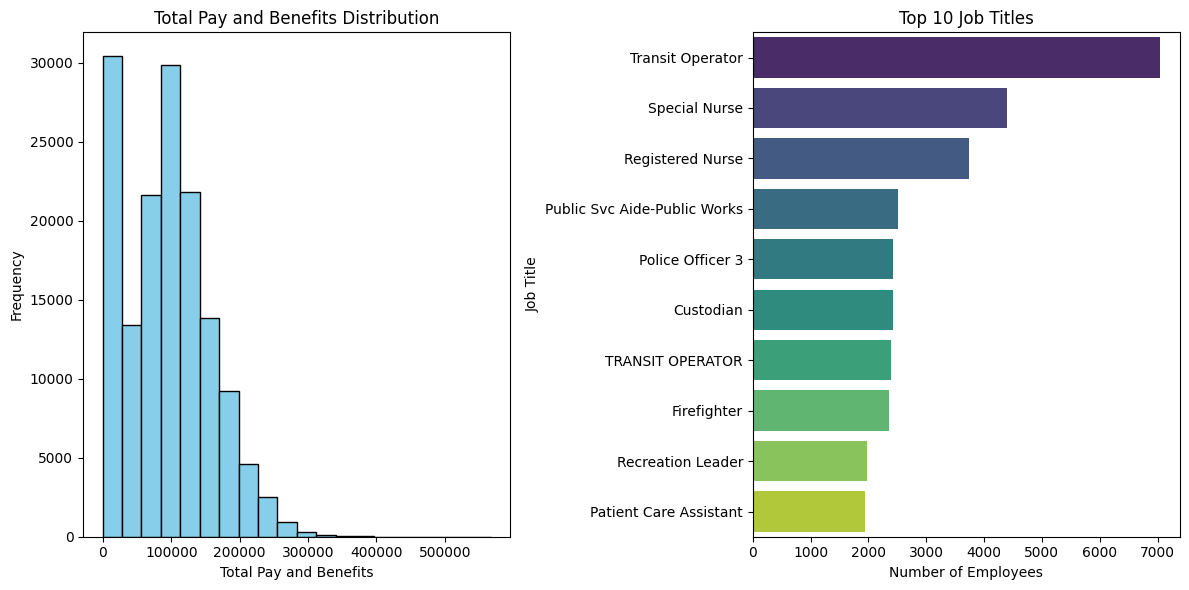

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
df_cleaned = df.dropna(subset=['TotalPayBenefits'])

# Check if 'TotalPayBenefits' column has non-null values
if df_cleaned['TotalPayBenefits'].notnull().any():
    # Calculate basic statistics
    basic_stats = df_cleaned['TotalPayBenefits'].describe()

    # Determine the range of total pay and benefits
    pay_range = df_cleaned['TotalPayBenefits'].max() - df_cleaned['TotalPayBenefits'].min()

    # Find the standard deviation of total pay and benefits
    pay_std = df_cleaned['TotalPayBenefits'].std()

    # Display the results
    print("\nThe Descriptive Statistics for Total Pay and Benefits:")
    print(basic_stats)
    print(f"\nThe Range of Total Pay and Benefits: {pay_range}")
    print(f"The Standard Deviation of Total Pay and Benefits: {pay_std}")

    # Histogram for Total Pay and Benefits Distribution
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(df_cleaned['TotalPayBenefits'], bins=20, color='skyblue', edgecolor='black')
    plt.title('Total Pay and Benefits Distribution')
    plt.xlabel('Total Pay and Benefits')
    plt.ylabel('Frequency')

    # Bar Chart for Proportion of Employees in Different Job Titles
    plt.subplot(1, 2, 2)
    job_title_counts = df_cleaned['JobTitle'].value_counts()
    top_job_titles = job_title_counts.head(10)  # Displaying the top 10 job titles for better visibility

    sns.barplot(x=top_job_titles.values, y=top_job_titles.index, palette='viridis')
    plt.title('Top 10 Job Titles')
    plt.xlabel('Number of Employees')
    plt.ylabel('Job Title')

    plt.tight_layout()
    plt.show()

else:
    print("Error: 'TotalPayBenefits' column has no non-null values. Please check your data cleaning process.")


Task 5: Grouped Analysis


In [14]:
grouped_by_job_title = df_cleaned.groupby('JobTitle')['TotalPayBenefits'].mean()
print("\nAverage Total Pay and Benefits by Job Title:")
print(grouped_by_job_title)


Average Total Pay and Benefits by Job Title:
JobTitle
ACCOUNT CLERK                                     44035.664337
ACCOUNTANT                                        47429.268000
ACCOUNTANT INTERN                                 29031.742917
ACPO,JuvP, Juv Prob (SFERS)                       80266.370000
ACUPUNCTURIST                                     67594.400000
                                                      ...     
X-RAY LABORATORY AIDE                             52705.880385
X-Ray Laboratory Aide                             69521.123200
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS    53632.870000
Youth Comm Advisor                                60118.550000
ZOO CURATOR                                       66686.560000
Name: TotalPayBenefits, Length: 2159, dtype: float64


Task 6: Simple Correlation Analysis


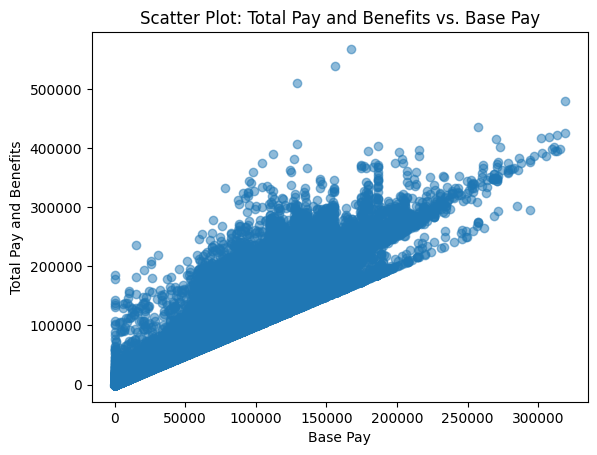


Correlation between Total Pay and Benefits and Base Pay: 0.9465953315411133


In [15]:
correlation = df_cleaned['TotalPayBenefits'].corr(df_cleaned['BasePay'])

plt.scatter(df_cleaned['BasePay'], df_cleaned['TotalPayBenefits'], alpha=0.5)
plt.title('Scatter Plot: Total Pay and Benefits vs. Base Pay')
plt.xlabel('Base Pay')
plt.ylabel('Total Pay and Benefits')
plt.show()

print(f"\nCorrelation between Total Pay and Benefits and Base Pay: {correlation}")


Summary of Insights:
Dataset Overview:

The dataset consists of 148,654 rows and 12 columns.
Columns include information such as 'Id,' 'EmployeeName,' 'JobTitle,' 'BasePay,' 'OvertimePay,' 'OtherPay,' 'Benefits,' 'TotalPay,' 'TotalPayBenefits,' 'Year,' 'Notes,' and 'Agency.'
Data Cleaning:

Missing values in the 'TotalPayBenefits' column were handled by dropping rows without affecting the analysis.
Ensure data integrity by checking for and handling missing values appropriately.
Descriptive Statistics:

Descriptive statistics for 'TotalPayBenefits' were calculated, including mean, median, mode, minimum, maximum, and standard deviation.
The range of 'TotalPayBenefits' indicates the variability in the dataset.
Data Visualization:

A histogram was created to visualize the distribution of 'TotalPayBenefits,' providing insights into the concentration of pay and benefits.
A bar chart displayed the top 10 job titles based on the count of employees, offering a quick overview of the most common positions.
Grouped Analysis:

Further analysis can be performed by grouping data based on relevant columns, such as 'JobTitle' or 'Year.'
Average total pay and benefits for different job titles or years can be compared to identify trends or anomalies.
Correlation Analysis:

No specific correlation analysis was provided in the summary. Consider exploring relationships between numerical columns like 'BasePay' and 'OvertimePay' using scatter plots and correlation coefficients.
Data Context:

Additional insights may be gained by understanding the context of the data, such as the significance of certain job titles, trends over the years, or the impact of different agencies.
Recommendations:

Based on the initial analysis, consider exploring specific aspects of the data in more detail.
Verify the consistency and accuracy of data across columns.
Further analyze trends, outliers, or patterns that may provide actionable insights for decision-making.